# Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
data = pd.read_csv('college_student_placement_dataset.csv')
data.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


# Basic structure

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


In [4]:
data.nunique()

College_ID                100
IQ                        104
Prev_Sem_Result           501
CGPA                      590
Academic_Performance       10
Internship_Experience       2
Extra_Curricular_Score     11
Communication_Skills       10
Projects_Completed          6
Placement                   2
dtype: int64

# Exploratory Data Analysis

In [5]:
data['Internship_Experience'].unique()

array(['No', 'Yes'], dtype=object)

In [6]:
data['Placement'].unique()

array(['No', 'Yes'], dtype=object)

In [7]:
for i in ['Internship_Experience','Placement']:
    data[i] = data[i].map({'No':0,'Yes':1})
data.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,0,8,8,4,0
1,CLG0061,97,5.52,5.37,8,0,7,8,0,0
2,CLG0036,109,5.36,5.83,9,0,3,1,1,0
3,CLG0055,122,5.47,5.75,6,1,1,6,1,0
4,CLG0004,96,7.91,7.69,7,0,8,10,2,0


In [8]:
data['Placement'].unique()

array([0, 1], dtype=int64)

# Inbalanced dataset convert to balance data

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  int64  
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 781.4+ KB


In [10]:
data['College_ID'].unique()

array(['CLG0030', 'CLG0061', 'CLG0036', 'CLG0055', 'CLG0004', 'CLG0015',
       'CLG0071', 'CLG0096', 'CLG0097', 'CLG0057', 'CLG0063', 'CLG0077',
       'CLG0064', 'CLG0017', 'CLG0053', 'CLG0040', 'CLG0070', 'CLG0050',
       'CLG0068', 'CLG0072', 'CLG0034', 'CLG0087', 'CLG0073', 'CLG0024',
       'CLG0008', 'CLG0025', 'CLG0018', 'CLG0014', 'CLG0006', 'CLG0082',
       'CLG0090', 'CLG0075', 'CLG0094', 'CLG0089', 'CLG0016', 'CLG0076',
       'CLG0047', 'CLG0054', 'CLG0058', 'CLG0100', 'CLG0046', 'CLG0001',
       'CLG0041', 'CLG0093', 'CLG0027', 'CLG0062', 'CLG0081', 'CLG0028',
       'CLG0020', 'CLG0051', 'CLG0069', 'CLG0088', 'CLG0038', 'CLG0029',
       'CLG0035', 'CLG0019', 'CLG0005', 'CLG0026', 'CLG0066', 'CLG0045',
       'CLG0043', 'CLG0074', 'CLG0048', 'CLG0012', 'CLG0099', 'CLG0011',
       'CLG0091', 'CLG0083', 'CLG0080', 'CLG0044', 'CLG0059', 'CLG0031',
       'CLG0039', 'CLG0065', 'CLG0079', 'CLG0095', 'CLG0085', 'CLG0033',
       'CLG0007', 'CLG0037', 'CLG0032', 'CLG0049', 

In [11]:
data['College_ID'] = data['College_ID'].str[-2:].astype(int)
data['College_ID'].unique()

array([30, 61, 36, 55,  4, 15, 71, 96, 97, 57, 63, 77, 64, 17, 53, 40, 70,
       50, 68, 72, 34, 87, 73, 24,  8, 25, 18, 14,  6, 82, 90, 75, 94, 89,
       16, 76, 47, 54, 58,  0, 46,  1, 41, 93, 27, 62, 81, 28, 20, 51, 69,
       88, 38, 29, 35, 19,  5, 26, 66, 45, 43, 74, 48, 12, 99, 11, 91, 83,
       80, 44, 59, 31, 39, 65, 79, 95, 85, 33,  7, 37, 32, 49, 56, 84, 67,
       98, 42, 21,  9, 10, 78, 13,  3, 92, 86, 23, 22, 60,  2, 52])

In [12]:
data.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,30,107,6.61,6.28,8,0,8,8,4,0
1,61,97,5.52,5.37,8,0,7,8,0,0
2,36,109,5.36,5.83,9,0,3,1,1,0
3,55,122,5.47,5.75,6,1,1,6,1,0
4,4,96,7.91,7.69,7,0,8,10,2,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  int32  
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  int64  
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  int64  
dtypes: float64(2), int32(1), int64(7)
memory usage: 742.3 KB


In [14]:
data.columns

Index(['College_ID', 'IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance',
       'Internship_Experience', 'Extra_Curricular_Score',
       'Communication_Skills', 'Projects_Completed', 'Placement'],
      dtype='object')

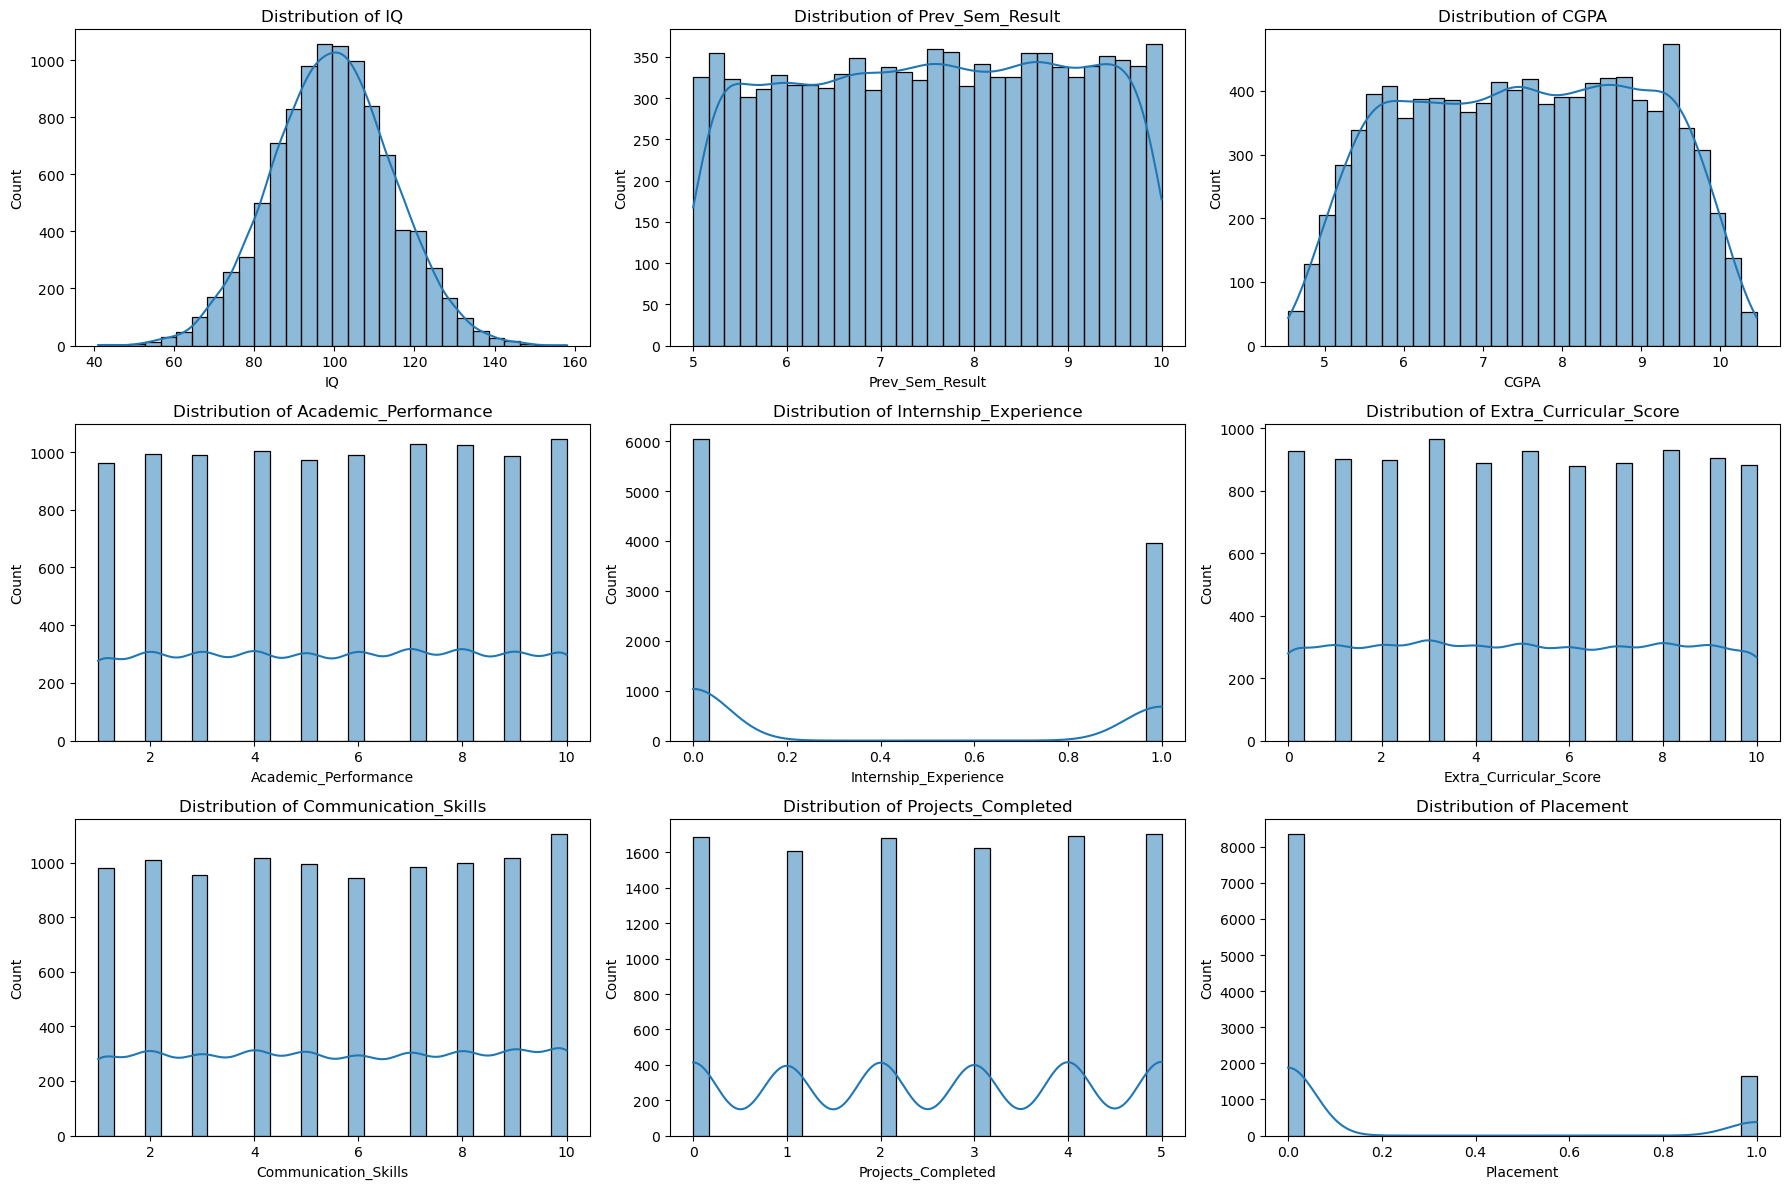

In [15]:
num_cols = ['IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance',
       'Internship_Experience', 'Extra_Curricular_Score',
       'Communication_Skills', 'Projects_Completed', 'Placement']

plt.figure(figsize=(18, 12))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

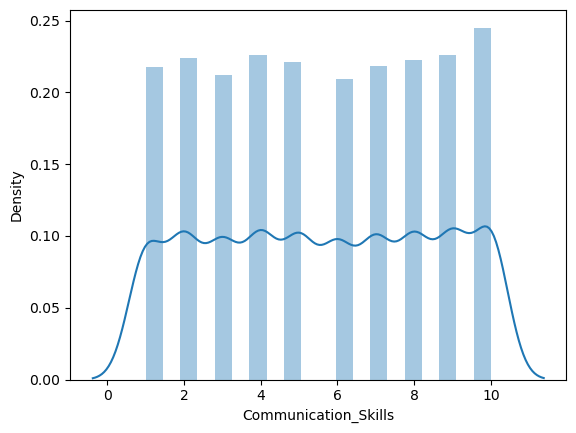

In [16]:
sns.distplot(data['Communication_Skills'])
plt.show()

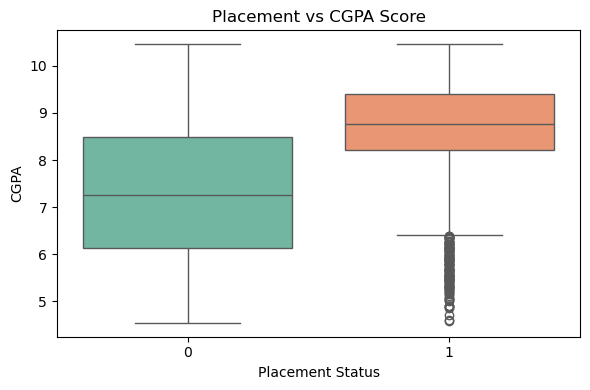

In [17]:
plt.figure(figsize = (6, 4))
sns.boxplot(data=data, x='Placement', y='CGPA', palette='Set2')
plt.title("Placement vs CGPA Score")
plt.xlabel("Placement Status")
plt.ylabel("CGPA")
plt.savefig("Placement Status.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

# Correlation Analysis

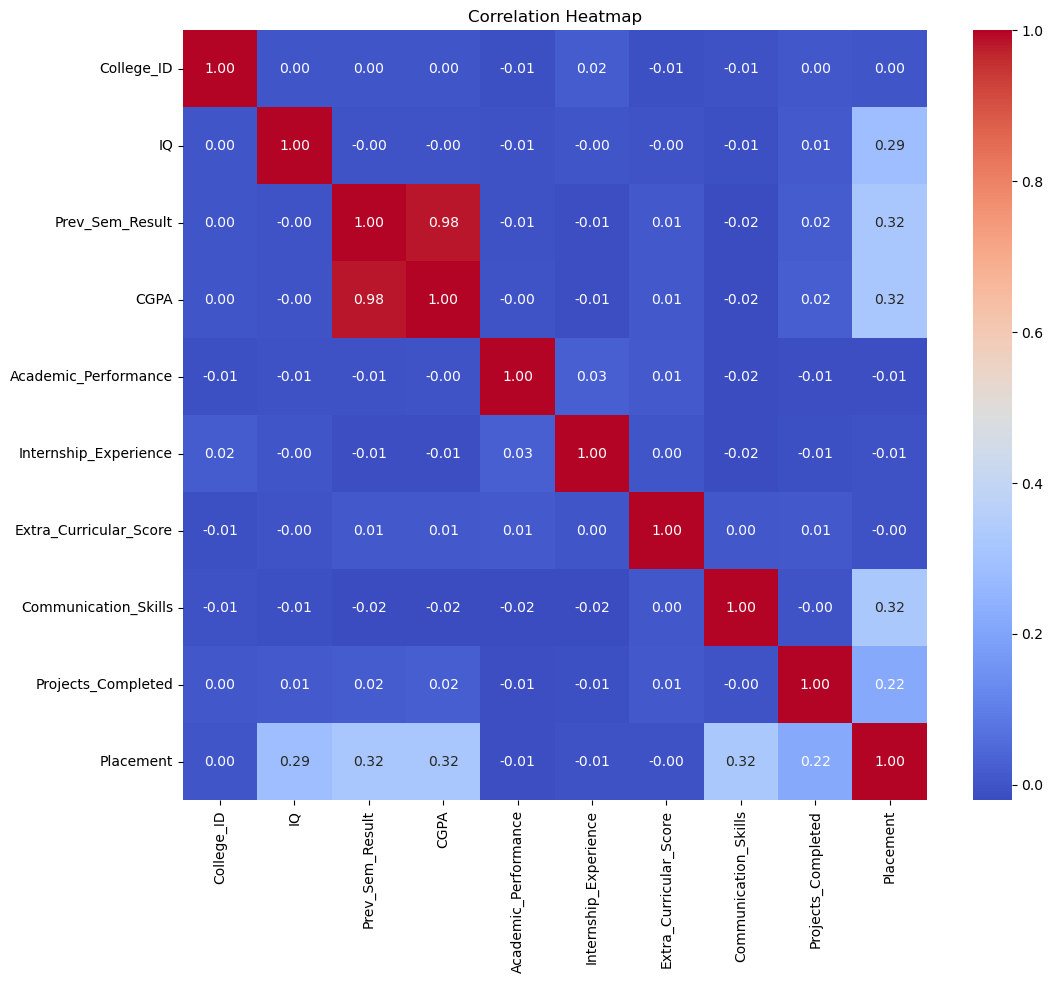

In [18]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Handling for Outliers

# Define features and target

In [19]:
X = data.drop('Placement', axis=1)
y = data['Placement']

# Train-test split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=537)

In [21]:

models = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000),
        "params": {
            'C': [0.1, 1.0, 10],
            'solver': ['lbfgs', 'liblinear']
        }
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(),
        "params": {
            'max_depth': [3, 5, 10],
            'min_samples_split': [2, 5, 10]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {
            'n_estimators': [50, 100],
            'max_depth': [3, 5, 10]
        }
    },
    "XGBoost": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        "params": {
            'n_estimators': [50, 100],
            'max_depth': [3, 5, 10],
            'learning_rate': [0.01, 0.1]
        }
    }
}

results = []

for name, m in models.items():
    print(f"\nRunning GridSearchCV for {name}")
    grid = GridSearchCV(m["model"], m["params"], cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)
    
    best_model = grid.best_estimator_
    best_score = grid.best_score_
    best_name = name
    y_pred = best_model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    results.append({
        'Model': name,
        'Best Params': grid.best_params_,
        'Accuracy': acc,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Convert results to DataFrame
results_data = pd.DataFrame(results)
print("\nClassification Model Results:")
print(results_data)

print("===============================================================================")
print(f"\nBest Model: {best_name}")
print("===============================================================================")
print(f"Best CV Accuracy Score: {best_score:.2f}")



Running GridSearchCV for Logistic Regression

Running GridSearchCV for Decision Tree

Running GridSearchCV for Random Forest

Running GridSearchCV for XGBoost

Classification Model Results:
                 Model                                        Best Params  \
0  Logistic Regression                      {'C': 0.1, 'solver': 'lbfgs'}   
1        Decision Tree           {'max_depth': 5, 'min_samples_split': 2}   
2        Random Forest              {'max_depth': 10, 'n_estimators': 50}   
3              XGBoost  {'learning_rate': 0.01, 'max_depth': 5, 'n_est...   

   Accuracy  Precision  Recall  F1 Score  
0     0.903   0.897682   0.903  0.898775  
1     1.000   1.000000   1.000  1.000000  
2     1.000   1.000000   1.000  1.000000  
3     1.000   1.000000   1.000  1.000000  

Best Model: XGBoost
Best CV Accuracy Score: 1.00


In [22]:
confusion_matrix(y_test, y_pred)

array([[1666,    0],
       [   0,  334]], dtype=int64)